In [1]:
# set path to parent file
from pathlib import Path
import os
cwd_path = Path.cwd()
set_path = str(cwd_path.parent)
os.chdir(set_path)

In [2]:
import pickle
from Utils import running_mean, multiple_runs_with_different_seed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import importlib
import SimulatedAnealing 
importlib.reload(SimulatedAnealing)
SimulatedAnnealing = SimulatedAnealing.SimulatedAnnealing
mpl.rcParams['figure.dpi'] = 300
from rana import rana_func

In [36]:
os.listdir("./Simulated_Annealing_Param_Opt/stored_data/")

['alpha_markov_chain1610569296.5602489.pkl',
 'alpha_markov_chain1610569870.1545694.pkl',
 'alpha_markov_chain1610571641.5611596.pkl',
 'alpha_markov_chain1610576793.1387656.pkl',
 'folding1610619842.6646283.pkl',
 'folding1610620406.6242716.pkl',
 'folding1610621930.2851722.pkl']

In [37]:
file = os.listdir("./Simulated_Annealing_Param_Opt/stored_data/")[-1]
result_list = pickle.load(open("./Simulated_Annealing_Param_Opt/stored_data/" + file, "rb"))
results_df = pd.DataFrame()
for result in result_list:
    results_df = results_df.append(result, ignore_index=True)

In [48]:
df = results_df.loc[results_df["pertubation_method"] == "Cholesky"]
argmin_indx = df["mean_performance_final"].argmin()
best_interval = df.iloc[argmin_indx]['update_step_size_when_not_accepted_interval']
print(f"""best interval is {best_interval}""")

best interval is 4.0


In [49]:
df = results_df.loc[results_df["pertubation_method"] == "Diagonal"]
argmin_indx = df["mean_performance_final"].argmin()
best_interval = df.iloc[argmin_indx]['update_step_size_when_not_accepted_interval']
print(f"""best interval is {best_interval}""")

best interval is 45.0


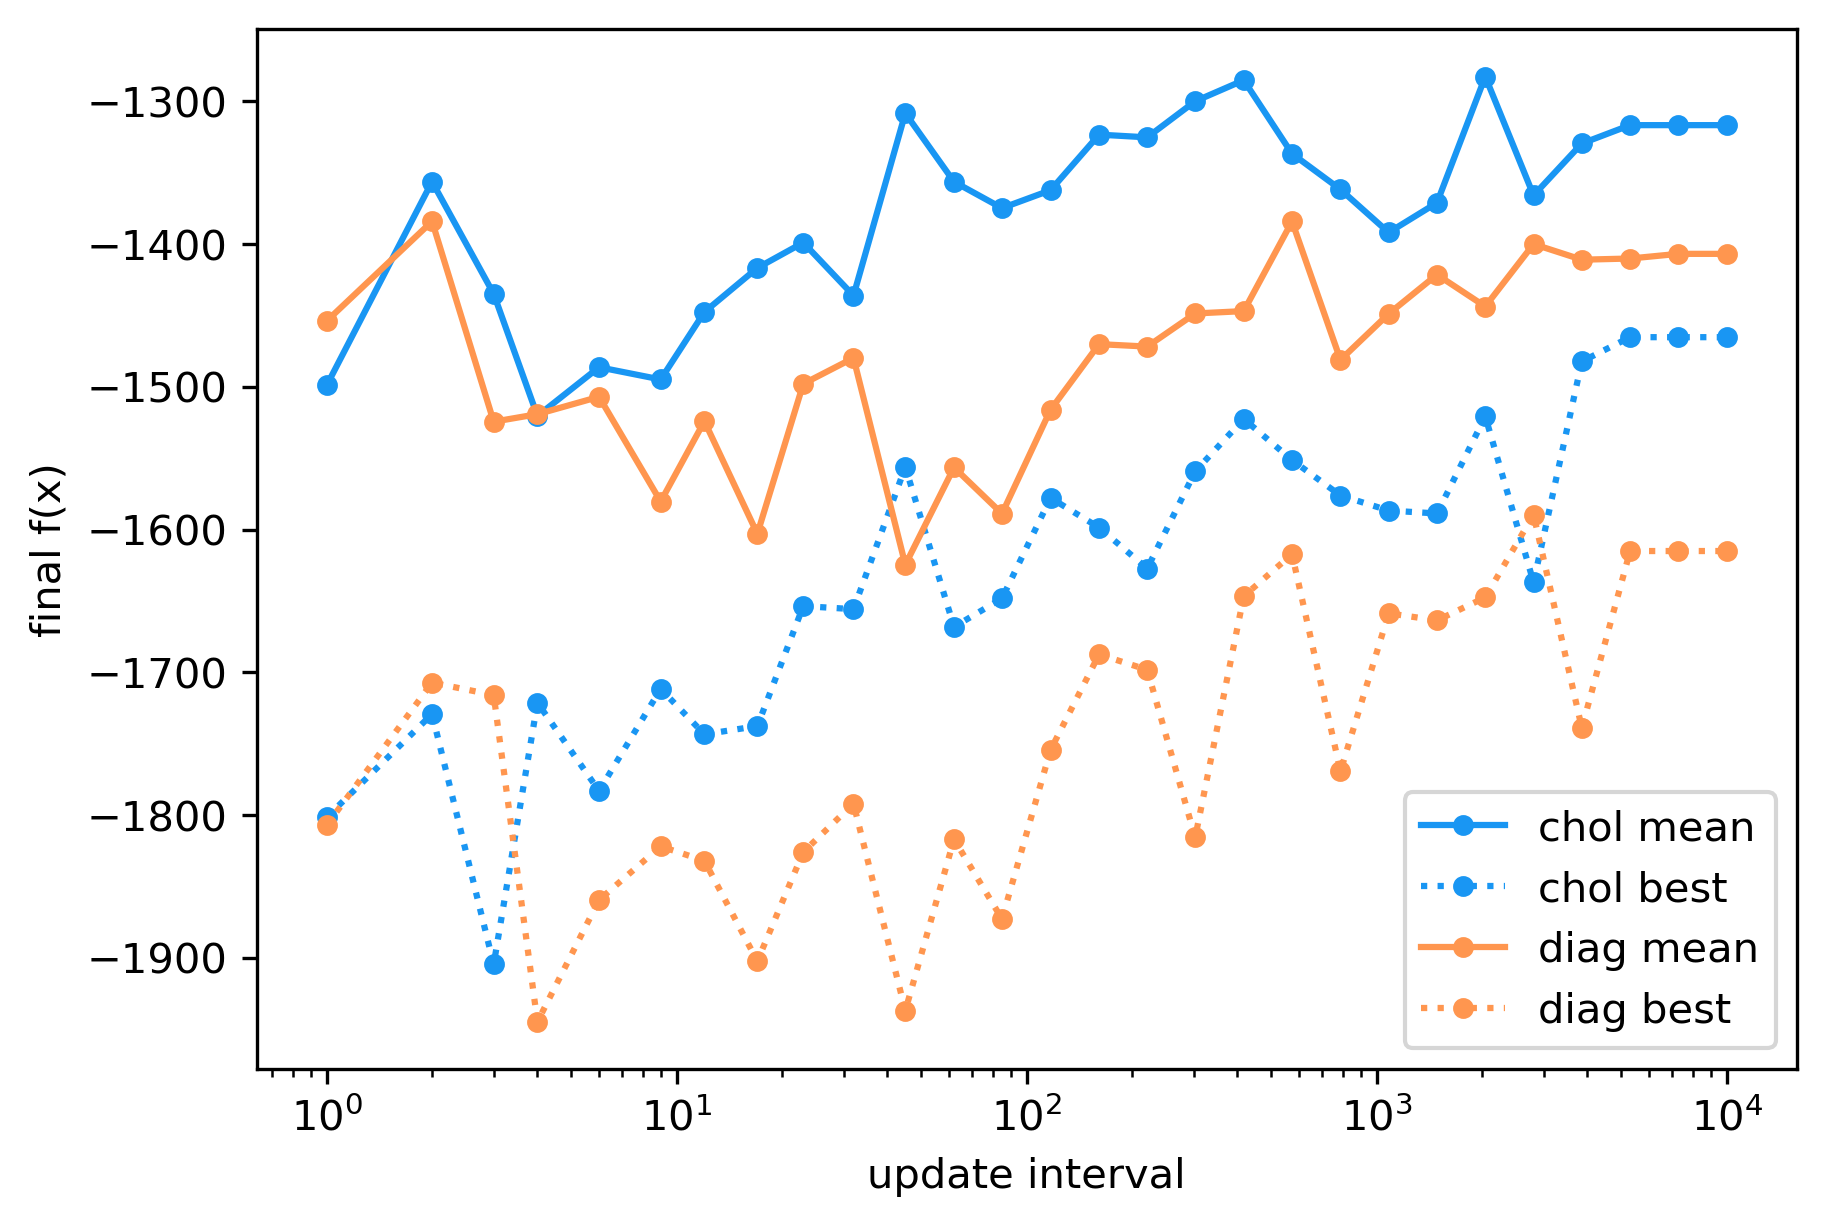

In [41]:
fig, axs = plt.subplots()
line_types= ["-", "dotted"]
methods = ["Cholesky", "Diagonal"]
names = ["chol", "diag"]
cols = mpl.cm.rainbow(np.linspace(0.2,0.8,2))
for i, method in enumerate(methods):
    df = results_df.loc[results_df["pertubation_method"] == method].sort_values(by="update_step_size_when_not_accepted_interval")
    axs.plot(df["update_step_size_when_not_accepted_interval"], df["mean_performance_final"], label=names[i] + " mean", color=cols[i],
            marker="o", linestyle="-", ms=4)
    axs.plot(df["update_step_size_when_not_accepted_interval"], df["best_performance_final"], label=names[i]+ " best", color=cols[i],
            marker="o", linestyle="dotted", ms=4)
    axs.set_xscale("log")
fig.tight_layout()
axs.legend()
axs.set_ylabel("final f(x)")
axs.set_xlabel("update interval")
fig.savefig("./Figures/SE5D_varying_interval.png")

In [ ]:
fig, axs = plt.subplots()
methods = ["Cholesky", "Diagonal"]
cols = mpl.cm.rainbow(np.linspace(0.2,0.8,2))
for i, method in enumerate(methods):
    df = results_df.loc[results_df["pertubation_method"] == method].sort_values(by="update_step_size_when_not_accepted_interval")
    axs.plot(df["update_step_size_when_not_accepted_interval"], df["mean_performance_final"], label=method, color=cols[i],
            marker="o", linestyle="-")
    #axs[i].plot(df["update_step_size_when_not_accepted_interval"], df["best_performance"])
    axs.set_xscale("log")
    #axs.set_ylim(-2000, -1400)
fig.tight_layout()
axs.legend()
axs.set_ylabel("mean final f(x)")
axs.set_xlabel("update interval")
axs.set_xlabel("update interval")
fig.savefig("./Figures/SE5D_varying_interval.png")

# Example plot

In [3]:
Diag_config = {"pertubation_method": "Diagonal",
                     "x_length": 5,
                     "x_bounds": (-500, 500),
                     "annealing_schedule":"simple_exponential_cooling",
                     "objective_function": rana_func,
                     "maximum_archive_length": 100,
                     "archive_minimum_acceptable_dissimilarity": 0.2,
                     "maximum_markov_chain_length": 50,
                     "maximum_function_evaluations": 10000,
                     "step_size_initialisation_fraction_of_range": 0.1,
                     "bound_enforcing_method": "not_clipping",
                     "cholesky_path_length": 5,
                     "update_step_size_when_not_accepted_interval":10000,
                    }

In [32]:
np.random.seed(0)
diag_SE = SimulatedAnnealing(**Diag_config )
diag_SE.run()
diag_SE.objective_history_array.min()

diag_SE.step_size_update_locations.append(diag_SE.accepted_objective_history_array[-1, 1])
diag_SE.step_size_matrix_history.append(diag_SE.step_size_matrix_history_array[-1])

converged


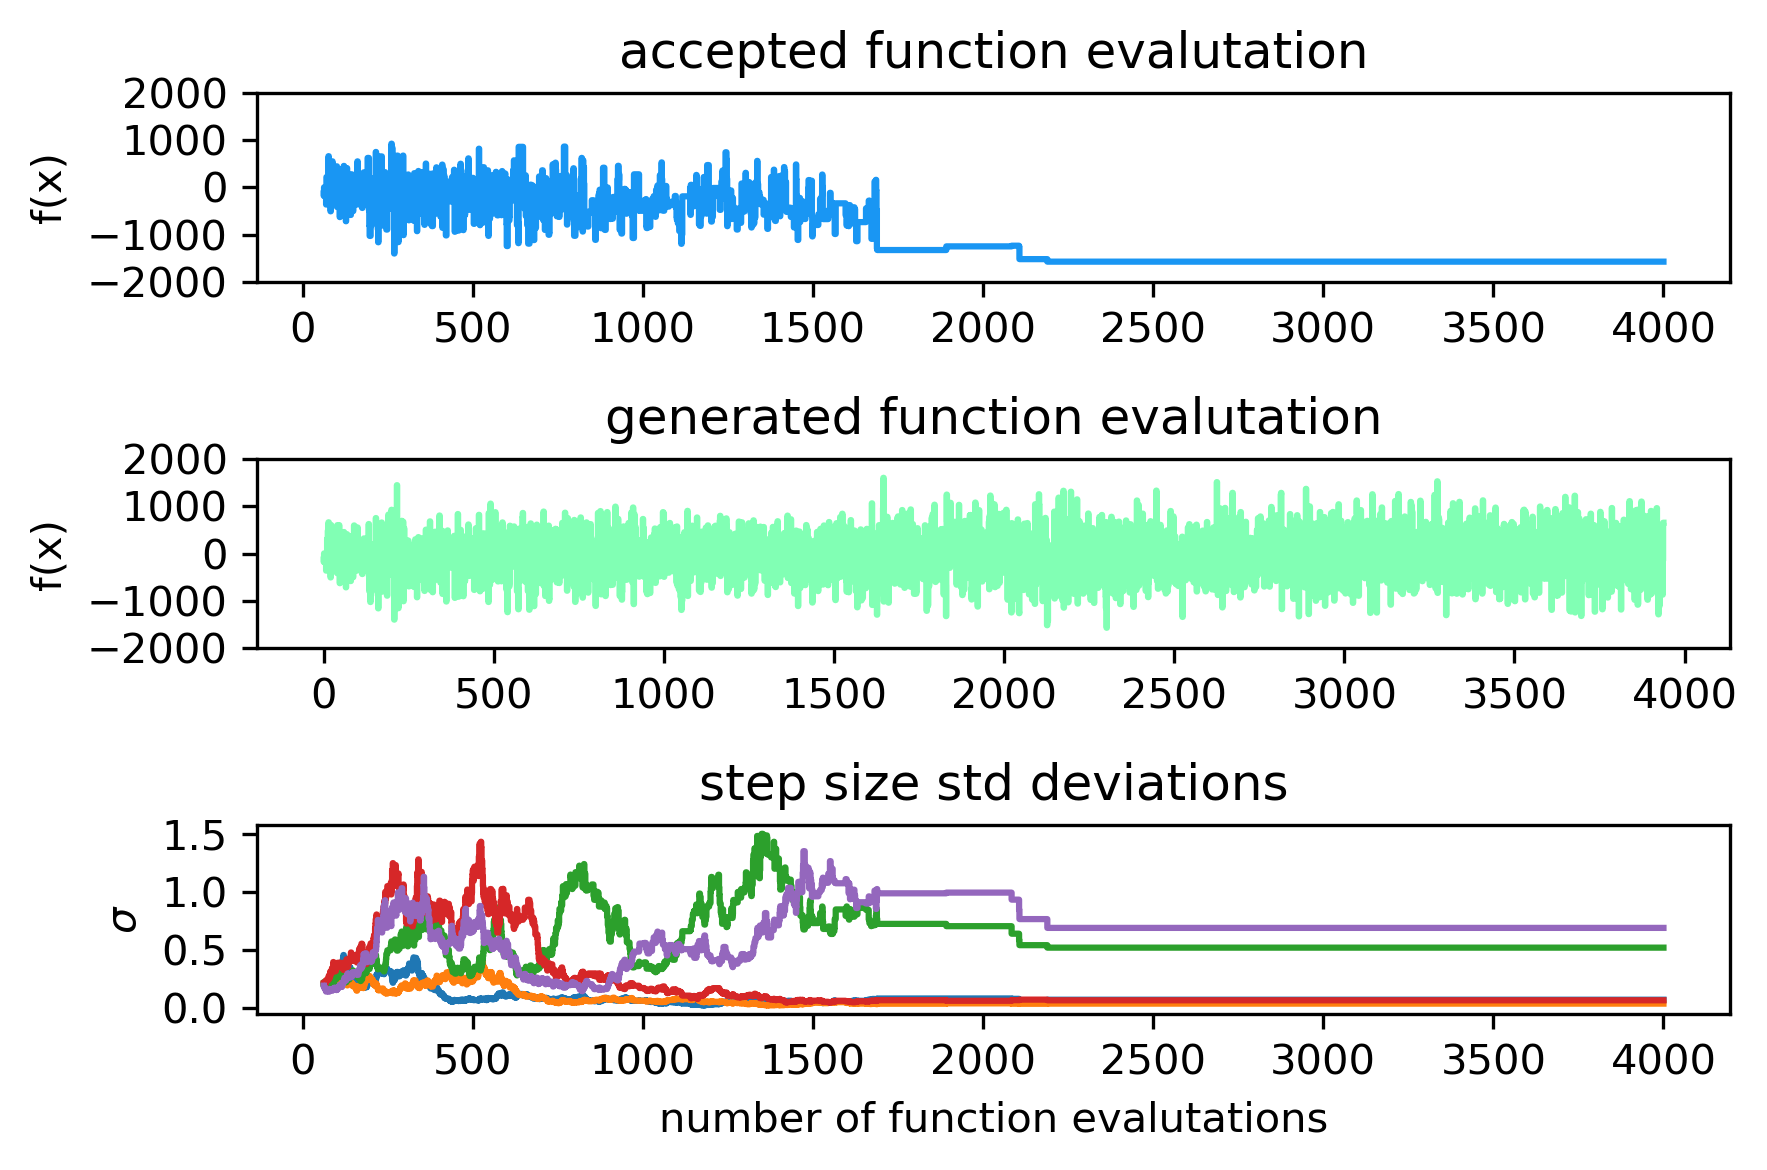

In [53]:
fig, axs = plt.subplots(3,1)
cols = mpl.cm.rainbow(np.linspace(0.2,0.8,3))
axs[0].step(diag_SE.accepted_objective_history_array[:, 1], diag_SE.accepted_objective_history_array[:, 0], color=cols[0])
axs[1].step(np.arange(len(diag_SE.objective_history_array)), diag_SE.objective_history_array, color=cols[1])

axs[2].step(diag_SE.step_size_update_locations_array, diag_SE.step_size_matrix_history_array)
#axs[2].step(step_size_update_locations_array,determinants, color=cols[2])

axs[0].set_yticks(np.linspace(-2000, 2000, 5))
axs[0].set_title("accepted function evalutation")
axs[0].set_ylabel("f(x)")


axs[1].set_yticks(np.linspace(-2000, 2000, 5))
axs[1].set_title("generated function evalutation")
axs[1].set_ylabel("f(x)")


axs[2].set_title("step size std deviations")
axs[2].set_ylabel(r"$\sigma$")
axs[2].set_xlabel("number of function evalutations")
#axs[2].set_yscale("log")
axs[2].set_yticks([0, 0.5, 1, 1.5])


fig.tight_layout()
fig.savefig("./Figures/SE5D_updating_step_size_issue.png")